<a href="https://colab.research.google.com/github/Mauriciocunha1996/Calculadora-Java-GUI/blob/master/Projeto_1_Classifica%C3%A7%C3%A3o_bin%C3%A1ria_breast_cance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1: Classificação binária brest cancer

## Etapa 1: Importação das bibliotecas

In [ ]:
import pandas as pd  #carregar a base de dados
from sklearn.model_selection import train_test_split  #divisão da base de dados
import numpy as np  #biblioteca científica
import seaborn as sns  #biblioteca gráfica para trabalhar com a visualização
from sklearn.metrics import confusion_matrix, accuracy_score # gerar matriz conf

In [ ]:
import torch
torch.__version__
!pip install torch==1.4.0  # instalar versão antiga usada na video aula


In [ ]:
import torch.nn as nn  # neural networks significa redes neurais 

## Etapa 2: Base de dados

In [ ]:
np.random.seed(123)
torch.manual_seed(123)

In [ ]:
previsores = pd.read_csv('/content/entradas_breast.csv')
classe = pd.read_csv('/content/saidas_breast.csv')

In [ ]:
previsores.shape

(569, 30)

In [ ]:
previsores.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [ ]:
classe.head()

,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
np.unique(classe)

array([0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


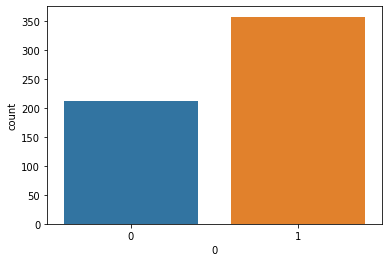

In [ ]:
sns.countplot(classe['0']); # o ['0'] por conta do zero acima da coluna e o ';' é para tirar os textos acima do grafico

In [ ]:
# 9º Passo
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores,
                                                                                              classe,
                                                                                              test_size = 0.25)

In [ ]:
previsores_treinamento.shape

(426, 30)

In [ ]:
classe_treinamento.shape

(426, 1)

In [ ]:
previsores_teste.shape

(143, 30)

In [ ]:
classe_teste.shape

(143, 1)

## Etapa 3: Transformação dos dados para tensores

In [ ]:
type(previsores_treinamento)

pandas.core.frame.DataFrame

In [ ]:
type(np.array(previsores_treinamento))

numpy.ndarray

In [ ]:
previsores_treinamento = torch.tensor(np.array(previsores_treinamento), dtype=torch.float)
classe_treinamento = torch.tensor(np.array(classe_treinamento), dtype=torch.float)

In [ ]:
type(previsores_treinamento)

torch.Tensor

In [ ]:
type(classe_treinamento)

torch.Tensor

In [ ]:
dataset = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)

In [ ]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

## Etapa 4: Construção do modelo

In [ ]:
# 30 -> 16 -> 16 -> 1
# (entradas + saida) / 2 = (30 + 1) / 2 = 16
classificador = nn.Sequential(
    nn.Linear(in_features=30, out_features=16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
)

In [ ]:
classificador.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [ ]:
criterion = nn.BCELoss()

In [ ]:
optimizer = torch.optim.Adam(classificador.parameters(), lr=0.001, weight_decay=0.0001)

## Etapa 5: Treinamento do modelo


In [ ]:
for epoch in range(100):
  running_loss = 0.

  for data in train_loader:
    inputs, labels = data
    #print(inputs)
    #print('-----')
    #print(labels)
    optimizer.zero_grad()

    outputs = classificador(inputs) # classificador.forward(inputs)
    #print(outputs)
    loss = criterion(outputs, labels)
    #print(loss)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print(f'Época %3d:perda %.5f'%(epoch+1, running_loss/(len(train_loader))))

Época   1:perda 10.78336
Época   2:perda 2.84863
Época   3:perda 1.67480
Época   4:perda 1.11414
Época   5:perda 0.63996
Época   6:perda 0.63753
Época   7:perda 0.58066
Época   8:perda 0.55460
Época   9:perda 0.55617
Época  10:perda 0.53322
Época  11:perda 0.55797
Época  12:perda 0.53816
Época  13:perda 0.52938
Época  14:perda 0.33227
Época  15:perda 0.51360
Época  16:perda 0.35532
Época  17:perda 0.49602
Época  18:perda 0.33208
Época  19:perda 0.29349
Época  20:perda 0.25046
Época  21:perda 0.29527
Época  22:perda 0.49888
Época  23:perda 0.47241
Época  24:perda 0.45883
Época  25:perda 0.27544
Época  26:perda 0.23399
Época  27:perda 0.26373
Época  28:perda 0.24136
Época  29:perda 0.28275
Época  30:perda 0.22633
Época  31:perda 0.19294
Época  32:perda 0.22258
Época  33:perda 0.20290
Época  34:perda 0.20888
Época  35:perda 0.20335
Época  36:perda 0.20316
Época  37:perda 0.18855
Época  38:perda 0.22316
Época  39:perda 0.23315
Época  40:perda 0.19261
Época  41:perda 0.17163
Época  42:perda

## Etapa 6: Visualização dos pesos

In [ ]:
# 30 -> 16 -> 16 -> 1
params = list(classificador.parameters())


In [ ]:
params

[Parameter containing:
 tensor([[-6.8758e-02, -4.5974e-02, -1.6881e-01,  5.1889e-02, -1.5407e-01,
           9.6941e-02, -1.3697e-01, -1.2676e-01, -2.2155e-01,  1.6481e-01,
          -3.7779e-02,  5.3912e-02, -1.2468e-01, -1.1436e-01, -1.3912e-03,
          -2.1398e-01, -3.9141e-01,  6.5978e-04, -6.6723e-03,  1.4566e-03,
           1.4102e-01, -2.0637e-02, -2.8877e-02,  1.4110e-01,  4.9312e-01,
           1.3069e-01, -1.8659e-01,  4.4318e-02,  2.9165e-01,  3.7982e-02],
         [ 1.9542e-01,  2.0732e-01,  2.8639e-01,  9.7069e-02, -1.3307e-01,
          -8.0457e-02, -6.7914e-02, -1.2084e-01, -2.8640e-02,  2.6983e-01,
          -6.2204e-02, -9.1055e-02, -7.9371e-03,  1.6734e-01, -7.2613e-03,
          -9.6179e-02, -1.1189e-02,  1.8739e-01,  1.0368e-01, -1.7496e-02,
           9.8523e-02,  6.1815e-02,  1.8995e-01,  7.5789e-03, -1.5083e-02,
          -2.4596e-01, -1.7552e-01, -7.0061e-03, -6.5762e-02, -1.6863e-01],
         [-1.2082e-02, -4.2609e-02, -2.4278e-01, -1.0345e-01, -8.2591e-03,


In [ ]:
# 30 -> 16 -> 16 -> 1
pesos0 = params[0]
pesos0.shape

torch.Size([16, 30])

In [ ]:
print(pesos0)

Parameter containing:
tensor([[-6.8758e-02, -4.5974e-02, -1.6881e-01,  5.1889e-02, -1.5407e-01,
          9.6941e-02, -1.3697e-01, -1.2676e-01, -2.2155e-01,  1.6481e-01,
         -3.7779e-02,  5.3912e-02, -1.2468e-01, -1.1436e-01, -1.3912e-03,
         -2.1398e-01, -3.9141e-01,  6.5978e-04, -6.6723e-03,  1.4566e-03,
          1.4102e-01, -2.0637e-02, -2.8877e-02,  1.4110e-01,  4.9312e-01,
          1.3069e-01, -1.8659e-01,  4.4318e-02,  2.9165e-01,  3.7982e-02],
        [ 1.9542e-01,  2.0732e-01,  2.8639e-01,  9.7069e-02, -1.3307e-01,
         -8.0457e-02, -6.7914e-02, -1.2084e-01, -2.8640e-02,  2.6983e-01,
         -6.2204e-02, -9.1055e-02, -7.9371e-03,  1.6734e-01, -7.2613e-03,
         -9.6179e-02, -1.1189e-02,  1.8739e-01,  1.0368e-01, -1.7496e-02,
          9.8523e-02,  6.1815e-02,  1.8995e-01,  7.5789e-03, -1.5083e-02,
         -2.4596e-01, -1.7552e-01, -7.0061e-03, -6.5762e-02, -1.6863e-01],
        [-1.2082e-02, -4.2609e-02, -2.4278e-01, -1.0345e-01, -8.2591e-03,
          4.95

In [ ]:
bias0 = params[1]
bias0.shape

torch.Size([16])

In [ ]:
pesos1 = params[2]
pesos1.shape

torch.Size([16, 16])

In [ ]:
bias1 = params[3]
bias1.shape

torch.Size([16])

#Etapa 7: Avaliação do modelo

In [ ]:
classificador.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [ ]:
type(previsores_teste)

pandas.core.frame.DataFrame

In [ ]:
previsores_teste = torch.tensor(np.array(previsores_teste), dtype=torch.float)

In [ ]:
type(previsores_teste)

torch.Tensor

In [ ]:
previsoes = classificador.forward(previsores_teste)

In [ ]:
previsoes

tensor([[9.9383e-01],
        [1.0000e+00],
        [3.1412e-01],
        [9.4383e-01],
        [1.3290e-04],
        [8.4746e-01],
        [9.4431e-01],
        [9.9988e-01],
        [6.2488e-01],
        [6.5691e-01],
        [9.1439e-01],
        [9.9876e-01],
        [6.7283e-01],
        [9.9518e-01],
        [9.9706e-01],
        [8.6089e-01],
        [9.9605e-01],
        [1.0000e+00],
        [2.9267e-01],
        [9.9612e-01],
        [7.4813e-10],
        [1.0656e-02],
        [5.8519e-01],
        [1.0000e+00],
        [9.0273e-01],
        [4.2905e-03],
        [8.2606e-01],
        [1.0000e+00],
        [1.8561e-04],
        [9.9753e-01],
        [5.3080e-01],
        [9.9999e-01],
        [9.2115e-01],
        [9.8746e-01],
        [4.5453e-01],
        [9.9757e-01],
        [6.0572e-01],
        [9.9787e-01],
        [9.9748e-01],
        [4.9014e-05],
        [6.0460e-03],
        [9.2253e-01],
        [1.5413e-07],
        [4.1097e-01],
        [7.4316e-05],
        [7

In [ ]:
previsoes = np.array(previsoes > 0.99)
previsoes

array([[ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [ ]:
classe_teste

,0
333,1
273,1
201,0
178,1
85,0
...,...
230,0
282,0
535,0
436,1


In [ ]:
taxa_acerto = accuracy_score(classe_teste, previsoes)
taxa_acerto

0.7202797202797203

In [ ]:
matriz = confusion_matrix(classe_teste, previsoes)
matriz

array([[51,  3],
       [37, 52]])

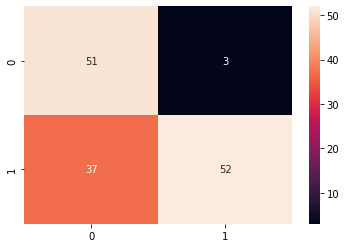

In [ ]:
sns.heatmap(matriz, annot=True);